In [1]:
# Importing crucial libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Reading the csv file and putting it into a Pandas dataframe

data = pd.read_csv('diamonds.csv')
data

,carat,cut,color,clarity,price
0,0.51,Premium,F,VS1,1749.0
1,2.25,Fair,G,I1,7069.0
2,0.70,Very Good,E,VS2,2757.0
3,0.47,Good,F,VS1,1243.0
4,0.30,Ideal,G,VVS1,789.0
...,...,...,...,...,...
49995,0.71,Ideal,H,VVS1,2918.0
49996,0.43,Ideal,G,VVS2,1056.0
49997,1.14,Premium,G,VS2,6619.0
49998,1.01,Premium,E,VS2,6787.0


In [3]:
# Checking if there are any empty values in the dataframe. If there are, delete their rows from the dataframe. Also, resetting the dataframe indexes

data.dropna(inplace = True)
data.reset_index(drop = True, inplace = True)

In [4]:
# Checking to see if any empty values remaining after the deletion

print(data.isna().sum())

carat      0
cut        0
color      0
clarity    0
price      0
dtype: int64


In [5]:
# Describing the data. Some value will give output 'NaN' because these columns don't include numerical values inside them.

data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
carat,49991.0,NaN,NaN,NaN,0.798603,0.474665,0.2,0.4,0.7,1.04,5.01
cut,49991,5,Ideal,19976,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,49991,7,G,10445,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,49991,8,SI1,12095,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,49991.0,NaN,NaN,NaN,1672239.427177,373009693.434912,326.0,948.0,2403.0,5330.5,83400000000.0


In [6]:
# Checking to see how many specific values exist in the each feature

print(f"Carats: {len(data['carat'].unique())}")
print(f"Cuts: {len(data['cut'].unique())}")
print(f"Colors: {len(data['color'].unique())}")
print(f"Clarities: {len(data['clarity'].unique())}")

Carats: 272
Cuts: 5
Colors: 7
Clarities: 8


In [7]:
# Encoding the textual data to represent each text as a number to make possible our linear regression operation

encoder = LabelEncoder()

data['cut'] = encoder.fit_transform(data['cut'])
cut_mappings = {index: label for index,label in enumerate(encoder.classes_)}

data['color'] = encoder.fit_transform(data['color'])
color_mappings = {index: label for index,label in enumerate(encoder.classes_)}

data['clarity'] = encoder.fit_transform(data['clarity'])
clarity_mappings = {index: label for index,label in enumerate(encoder.classes_)}

In [8]:
# Seeing each number representation for each encoded feature 

print(cut_mappings)
print(color_mappings)
print(clarity_mappings)

{0: 'Fair', 1: 'Good', 2: 'Ideal', 3: 'Premium', 4: 'Very Good'}
{0: 'D', 1: 'E', 2: 'F', 3: 'G', 4: 'H', 5: 'I', 6: 'J'}
{0: 'I1', 1: 'IF', 2: 'SI1', 3: 'SI2', 4: 'VS1', 5: 'VS2', 6: 'VVS1', 7: 'VVS2'}


In [9]:
data

,carat,cut,color,clarity,price
0,0.51,3,2,4,1749.0
1,2.25,0,3,0,7069.0
2,0.70,4,1,5,2757.0
3,0.47,1,2,4,1243.0
4,0.30,2,3,6,789.0
...,...,...,...,...,...
49986,0.71,2,4,6,2918.0
49987,0.43,2,3,7,1056.0
49988,1.14,3,3,5,6619.0
49989,1.01,3,1,5,6787.0


In [10]:
# Defining a method to plot the data distribution for each feature

def plot_boxplot(dataframe, feature):
  dataframe.boxplot(column = [feature])
  plt.grid(False)
  plt.show()

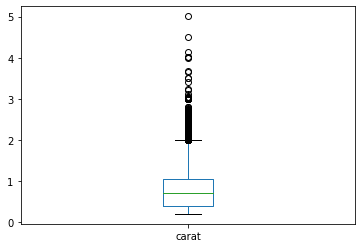

In [11]:
plot_boxplot(data, 'carat')

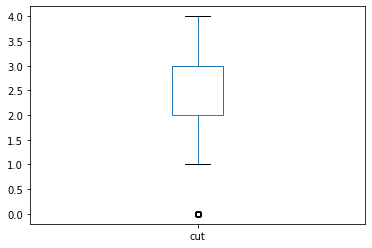

In [12]:
plot_boxplot(data, 'cut')

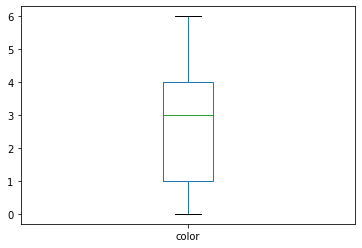

In [13]:
plot_boxplot(data, 'color')

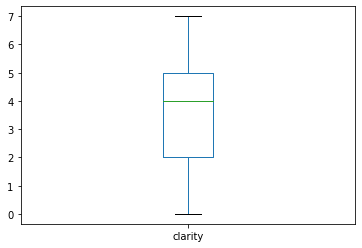

In [14]:
plot_boxplot(data, 'clarity')

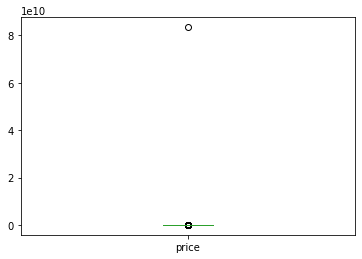

In [15]:
plot_boxplot(data, 'price')

In [16]:
# Defining a method to use IQR outlier cleaning method

def outliers(dataframe, feature):
  Q1 = dataframe[feature].quantile(0.25)
  Q3 = dataframe[feature].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  ls = dataframe.index[(dataframe[feature] < lower_bound) | (dataframe[feature] > upper_bound)]
  return ls

In [17]:
# Looping on the data for each feature and detecting the outliers

index_list = []

for feature in ['carat', 'cut', 'color', 'clarity', 'price']:
  index_list.extend(outliers(data, feature))

print(len(index_list))
print(index_list)

6554
[1, 6, 14, 83, 89, 146, 174, 175, 191, 213, 336, 397, 433, 446, 460, 472, 527, 533, 564, 591, 596, 601, 605, 634, 661, 669, 719, 725, 767, 839, 847, 850, 853, 894, 903, 919, 947, 965, 1094, 1116, 1157, 1205, 1264, 1337, 1340, 1380, 1409, 1485, 1503, 1526, 1565, 1588, 1601, 1642, 1655, 1688, 1720, 1757, 1769, 1812, 1822, 1885, 1910, 2063, 2114, 2139, 2143, 2152, 2197, 2294, 2307, 2356, 2388, 2437, 2469, 2485, 2558, 2581, 2639, 2651, 2699, 2717, 2757, 2764, 2810, 2828, 2880, 2898, 2899, 2929, 2937, 3145, 3158, 3190, 3193, 3202, 3236, 3246, 3270, 3280, 3281, 3285, 3289, 3298, 3312, 3358, 3407, 3433, 3445, 3463, 3464, 3466, 3503, 3504, 3516, 3520, 3535, 3566, 3597, 3604, 3606, 3645, 3673, 3675, 3716, 3724, 3764, 3787, 3790, 3810, 3813, 3821, 3829, 3847, 3865, 3877, 3892, 3903, 3957, 3964, 3969, 3979, 3994, 3998, 4026, 4067, 4074, 4136, 4157, 4168, 4191, 4209, 4234, 4237, 4277, 4291, 4323, 4332, 4343, 4365, 4366, 4424, 4480, 4515, 4522, 4527, 4599, 4639, 4649, 4719, 4722, 4733, 4774, 4

In [18]:
# Defining a method to delete existing outliers from our dataframe

def remove_outliers(dataframe, ls):
  ls = sorted(set(ls))
  dataframe = dataframe.drop(ls)
  dataframe.reset_index(drop=True, inplace=True)

  return dataframe

In [19]:
# Sending our existing dataframe and detected outlier indexes to clean existing dataframe from current outliers

cleaned_data = remove_outliers(data, index_list)
cleaned_data.shape

(45138, 5)

In [20]:
# Separating our dataframe as the input columns and output column 

y = cleaned_data['price'] 
X = cleaned_data.drop('price', axis=1)
X

,carat,cut,color,clarity
0,0.51,3,2,4
1,0.70,4,1,5
2,0.47,1,2,4
3,0.30,2,3,6
4,0.33,2,0,2
...,...,...,...,...
45133,0.71,2,4,6
45134,0.43,2,3,7
45135,1.14,3,3,5
45136,1.01,3,1,5


In [21]:
y

0        1749.0
1        2757.0
2        1243.0
3         789.0
4         728.0
          ...  
45133    2918.0
45134    1056.0
45135    6619.0
45136    6787.0
45137    9428.0
Name: price, Length: 45138, dtype: float64

In [22]:
# Fitting our existing dataframe values into the interval of 0-1. Each specific value represents a specific number between zero and one

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[0.17222222, 0.66666667, 0.33333333, 0.57142857],
       [0.27777778, 1.        , 0.16666667, 0.71428571],
       [0.15      , 0.        , 0.33333333, 0.57142857],
       ...,
       [0.52222222, 0.66666667, 0.5       , 0.71428571],
       [0.45      , 0.66666667, 0.16666667, 0.71428571],
       [0.87222222, 0.66666667, 1.        , 0.71428571]])

In [23]:
# Splitting the training and testing data (80% for training and 20% for testing)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [24]:
# Creating a linear regression model and giving the training inputs to the created model

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [25]:
# Observing the "r-square" and "root mean square error" values depending on test set. "1.0" is best for R^2 and RMSE depends on the existing data

y_pred = model.predict(X_test)

print(f"The score for R^2: {r2_score(y_test, y_pred)}")
print(f"The score for RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")

The score for R^2: 0.8862010240806438
The score for RMSE: 928.983810262254
